# Analisis Kolom GDP perkapita terhadap Kesehatan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('C:/Users/A r e s/Documents/SANBERCODE/Latihan/Pekan 4/datasets/Data_Negara_HELP.csv')

In [3]:
group1 = df.groupby(['Negara']).sum()
drop1 = group1.drop(columns=['Ekspor', 'Impor', 'Harapan_hidup', 'Kematian_anak', 'Inflasi', 'Pendapatan', 'Jumlah_fertiliti'])
sort1 = drop1.sort_values(by='GDPperkapita', ascending=True)
sort1.head(15)

,Kesehatan,GDPperkapita
Negara,,
Burundi,11.60,231
Liberia,11.80,327
"Congo, Dem. Rep.",7.91,334
Niger,5.16,348
Sierra Leone,13.10,399
Madagascar,3.77,413
Mozambique,5.21,419
Central African Republic,3.98,446
Malawi,6.59,459


Dari data diatas bisa dilihat hubungan kasar antara 'GDPperkapita' terhadap 'Kesehatan', rata-rata negara yang mempunyai angka GDPperkapita rendah memiliki angka kesadaran atas kesehatan yang buruk

Hubungan sederhana dari kedua variabel bisa dilihat dari scatterplot dibawah 

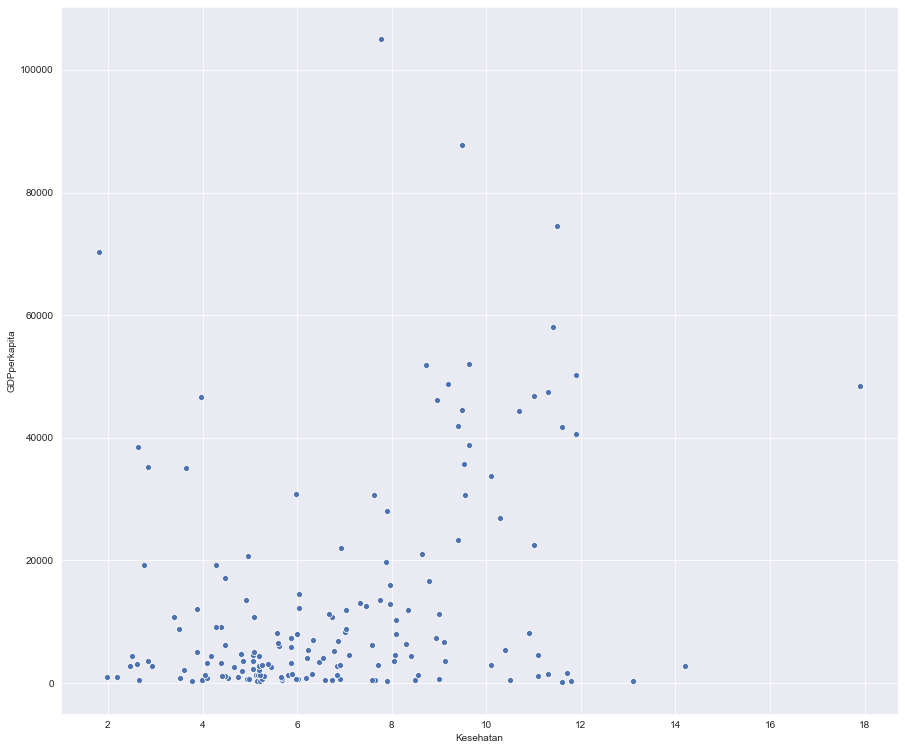

In [4]:
sns.set({'figure.figsize':(15,13)})
sns.scatterplot(x=sort1['Kesehatan'] , y=sort1['GDPperkapita'])

In [8]:
pertimbangan3 = sort1[(sort1['Kesehatan'] > 12.1) & (sort1['Kesehatan'] < 20) & (sort1['GDPperkapita'] < 10000)]
pertimbangan3

,Kesehatan,GDPperkapita
Negara,,
Sierra Leone,13.1,399
"Micronesia, Fed. Sts.",14.2,2860


## Analisis lebih lanjut tentang dampak Kematian anak terhadap GDPperkapita

Untuk menganalisis lebih lanjut topik ini, maka data pada kolom inflasi dan GDPperkapita harus dibersihkan terlebih dahulu

### Missing Value

In [9]:
#Check missing value
sort1.isnull().sum()

Kesehatan       0
GDPperkapita    0
dtype: int64

Karena tidak ada missing value (data NaN) pada dataframe, jadi perlu dilakukan handling missing value

### Outliers dan Clustering

Mendeteksi outlier di kedua kolom menggunakan boxplot

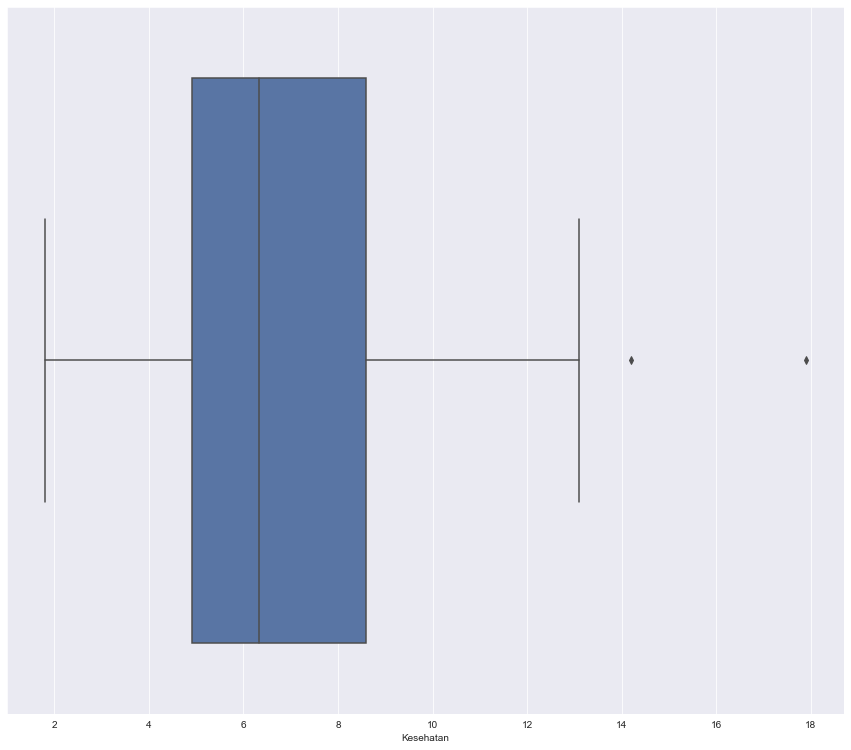

In [10]:
sns.boxplot(sort1['Kesehatan'])

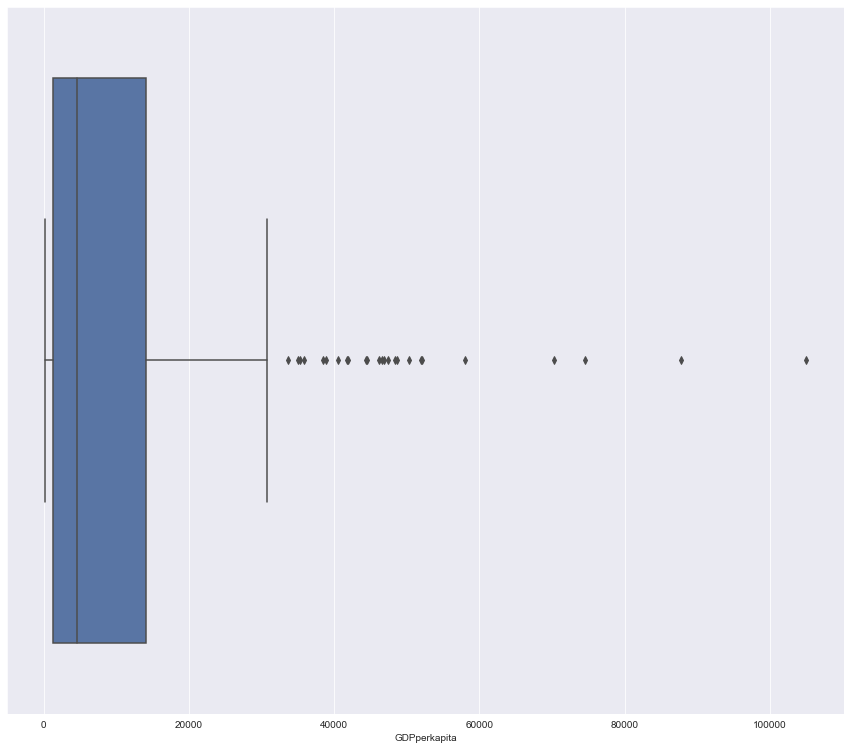

In [11]:
sns.boxplot(sort1['GDPperkapita'])

In [12]:
def batas(x) : 
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    df_final=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return df_final

data = batas(sort1[['Kesehatan', 'GDPperkapita']])
data.dropna(axis=0, inplace=True)
data2 = pd.DataFrame(data=data, columns = ['Kesehatan', 'GDPperkapita'])

sc = StandardScaler()
data_std = sc.fit_transform(data2.astype(float))

data3 = pd.DataFrame(data=data_std, columns = ['Kesehatan', 'GDPperkapita'])

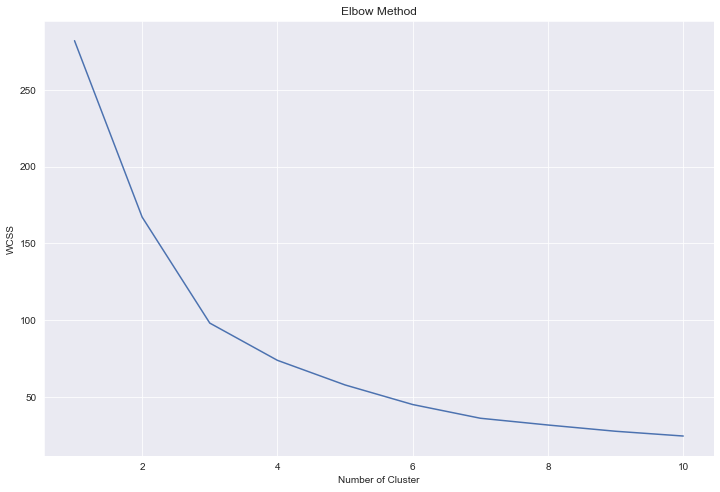

In [13]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data3)
  wcss.append(kmeans.inertia_)

plt.subplots(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

plt.show()

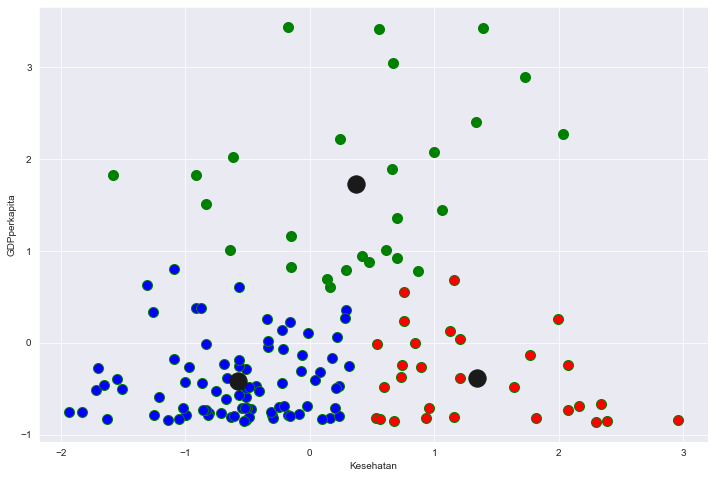

In [15]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data_std)
labels1 = kmeans.labels_


data3['label_kmeans1'] = labels1

plt.subplots(figsize=(12,8))
plt.scatter(data3['Kesehatan'][data3.label_kmeans1 == 0], data3['GDPperkapita'][data3.label_kmeans1 == 0], color='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(data3['Kesehatan'][data3.label_kmeans1 == 1], data3['GDPperkapita'][data3.label_kmeans1 == 1], color='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(data3['Kesehatan'][data3.label_kmeans1 == 2], data3['GDPperkapita'][data3.label_kmeans1 == 2], color='green', s=100, edgecolor='green', linestyle='-')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Kesehatan')
plt.ylabel('GDPperkapita')
plt.show()

Hubungan center dengan anggotanya pada klaster ini tidak bisa diambil kesimpulan, ada negara yang mempunyai nilai kesehatan yang tinggi tapi memiliki GDP yang rendah

## Kesimpulan

Negara yang dipertimbangkan untuk dimasukkan sebagai penerima bantuan dari HELP Internasional :

- Sierra Leone
- Micronesia, Fed. Sts.